In [85]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [86]:
class MyDataset(Dataset):
    # 构造函数
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    # 返回数据集大小
    def __len__(self):
        return self.data_tensor.size(0)
    # 返回索引的数据与标签
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [87]:
def map_array(arr):
    mapped_array = []
    for num in arr:
        if num == 0:
            mapped_array.append([1, 0])
        elif num == 1:
            mapped_array.append([0, 1])
    return mapped_array

In [88]:
def Predict(O):
    Output = O.detach().numpy().tolist()
    if(Output(0)>Output(1)):
        return 0
    else:
        return 1

In [89]:
from scipy.io import loadmat
file6 = "D:\\320 Deep-learning\data\\1118_S6_time1000.mat"
data6 = loadmat(file6)
file12 = "D:\\320 Deep-learning\data\\1111_S12_time1000.mat"
data12 = loadmat(file12)
file24 = "D:\\320 Deep-learning\data\\1111_S24_time1000.mat"
data24 = loadmat(file24)
""" experiment
X_train = data['Input']
X_train = torch.from_numpy(X_train).float()
y_train = data['Stability']
y_train = y_train.astype(np.float32) / 255
y_train = torch.tensor(y_train)
len_train = len(y_train)
X_test = data['PreInput']
X_test = torch.from_numpy(X_test).float()
y_test = data['PreSta']
y_test = y_test.astype(np.float32) / 255
y_test = torch.tensor(y_test)
len_test = len(y_test) """

#simulation
X6 = data6['Input_Presence']
X6 = torch.from_numpy(X6).float()
y6 = data6['Stability']
y6 = torch.from_numpy(y6).float()

X12 = data12['Input_RelativeAbundance']
X12 = torch.from_numpy(X12).float()
y12 = data12['Stability']
y12 = torch.from_numpy(y12).float()

X24 = data24['Input_RelativeAbundance']
X24 = torch.from_numpy(X24).float()
y24= data24['Stability']
y24 = torch.from_numpy(y24).float()

t = 300
X_train = X6[0:t,:]
y_train = X6[0:t,0]
X_test = X6[t:1000,:]
y_test = X6[t:1000,0]

len_train = len(y_train)
len_test = len(y_test)

# total number of 0 or 1 in training data (prepare for weight)
Num_0 = (y_train==0).sum()
Num_1 = (y_train==1).sum()
Weights = torch.Tensor([1/Num_0.item(),1/Num_1.item()])


# 将数据封装成Dataset
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

In [90]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 5

# prepare data loaders
train_dataloader = DataLoader(dataset = train_dataset, # 传入的数据集, 必须参数
                               batch_size = batch_size,       # 输出的batch大小
                               shuffle = True,       # 数据是否打乱
                               num_workers = num_workers)      # 进程数, 0表示只有主进程
test_dataloader = DataLoader(dataset = test_dataset, # 传入的数据集, 必须参数
                               batch_size = batch_size,       # 输出的batch大小
                               shuffle = True,       # 数据是否打乱
                               num_workers = num_workers)      # 进程数, 0表示只有主进程


In [91]:
import torch.nn as nn
import torch.nn.functional as F

# define NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(54, 2)
    def forward(self,x):
        #x = self.fc1(x) 
        x = F.sigmoid(self.fc1(x))
        return x

# initialize the NN
model = Net()
#print(model)

In [92]:
# specify loss function
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr = 0.05)

[0.9042857142857142, 0.9328571428571428, 0.9842857142857143, 0.9957142857142857, 0.9914285714285714, 0.9985714285714286, 0.9985714285714286, 0.9985714285714286, 0.9985714285714286, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

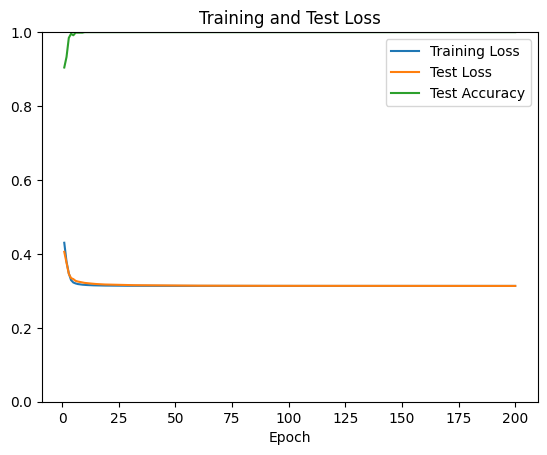

In [93]:
# number of epochs to train the model
n_epochs = 200
train_loss_min = np.Inf  # set initial "min" to infinity
train_loss_curve = list()
test_loss_curve = list()
test_acc = list()

for epoch in range(n_epochs):
    train_loss = 0
    # train the model #
    loss = 0
    for data, target in train_dataloader: 
        optimizer.zero_grad()
        output = model(data)
        #make target a tensor:torch.Size([10]),dtype = long
        target = target.view(batch_size)
        target = target.long()
        #target = target.T
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    # calculate average loss over an epoch
    train_loss = train_loss / len_train
    train_loss_curve.append(train_loss)
    #print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
    
    # save model
    if train_loss <= train_loss_min:
        #print('Train loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(train_loss_min,train_loss))
        torch.save(model.state_dict(), 'model.pt')
        train_loss_min = train_loss

    test_loss = 0.0
    
    class_correct = list(0. for i in range(2))
    class_total = list(0. for i in range(2))

    for data, target in test_dataloader:
        output = model(data)
        target = target.view(batch_size)
        target = target.long()
        loss = criterion(output, target)
        test_loss += loss.item()*data.size(0)
        pred = output.argmax(dim=1)
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        for i in range(len(target)):
            if (target.data[i]>0.5):
                label = 1
            else:
                label = 0
        #label = torch.tensor(target.data[i], dtype=torch.int64)
            class_correct[label] += correct[i].item()
            class_total[label] += 1
    test_acc.append(np.sum(class_correct) / np.sum(class_total))
    test_loss = test_loss/len_test
    test_loss_curve.append(test_loss)
print(test_acc)
plt.plot(np.linspace(1,n_epochs,n_epochs),train_loss_curve)
plt.plot(np.linspace(1,n_epochs,n_epochs),test_loss_curve)
plt.plot(np.linspace(1,n_epochs,n_epochs),test_acc)
plt.title("Training and Test Loss")
plt.xlabel("Epoch")
plt.ylim(0,1)
plt.legend(['Training Loss','Test Loss','Test Accuracy'])
plt.show()

In [94]:
model.load_state_dict(torch.load('model.pt'))
print(model.fc1.weight)

test_loss = 0.0
correct = 0
OUTPUT = []

for i in range(len_test):
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(X_test[i])
    o = output.tolist()
    OUTPUT.append(o)



Parameter containing:
tensor([[-21.9166,   2.6251,   4.2459,   2.2463,   2.4448,   4.2797,   2.7524,
           1.3341,   1.7436,   2.2859,   1.7168,   2.5428,   2.6211,   1.6896,
           1.8454,   1.6358,   2.6126,   1.0425,   1.6915,   2.5666,   2.0620,
           2.2315,   1.1724,   2.1827,   1.3383,   2.2312,   1.5727,   1.7312,
           2.1761,   2.0010,   1.8192,   1.3885,   2.9502,   1.3000,   1.3835,
           1.3238,   2.1715,   2.5607,   2.2572,   1.3755,   2.2850,   1.1485,
           2.2044,   1.0722,   2.0119,   2.7565,   1.4543,   2.5702,   1.2742,
           2.2238,   1.9358,   1.5297,   4.2471,   2.7973],
        [ 21.9423,  -2.6145,  -4.3904,  -2.2322,  -2.4375,  -4.3583,  -2.7431,
          -1.3051,  -1.7188,  -2.2764,  -1.6955,  -2.5340,  -2.6019,  -1.6519,
          -1.8230,  -1.6057,  -2.6103,  -1.0157,  -1.6778,  -2.5688,  -2.0525,
          -2.2227,  -1.1362,  -2.1539,  -1.3114,  -2.2107,  -1.5425,  -1.7051,
          -2.1636,  -1.9718,  -1.7974,  -1.3627, 